Text(87.72222222222221, 0.5, 'arg $H(j\\omega)$')

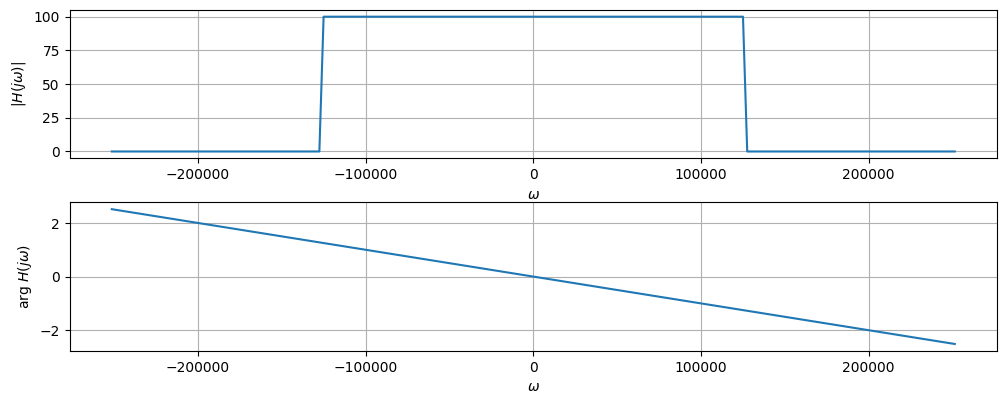

In [2]:
# ================= ISS: frequency response
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk, ellipord, ellip
from mpl_toolkits import mplot3d
import mpl_toolkits.mplot3d.art3d as art3d

# >>>>>>>>>>>>>>>>> #amplifier <<<<<<<<<<<<<<<<<<<<<<<<<
om_cut = 40000 * np.pi
om = np.linspace(-2*om_cut, 2*om_cut, 200)
absH = np.zeros(om.shape)
absH[(om > -om_cut) & (om < om_cut)] = 100
argH = -om / 100000

fig, ax = plt.subplots(2,1,figsize=(10,4))
fig.tight_layout()
ax[0].plot(om,absH)
ax[0].grid()
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|H(j\omega)|$')

ax[1].plot(om,argH)
ax[1].grid()
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('arg $H(j\omega)$')


<StemContainer object of 3 artists>

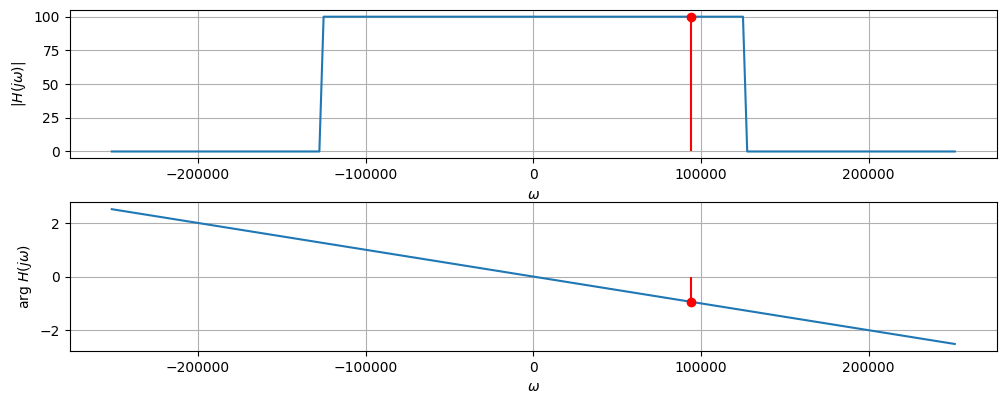

In [3]:
# >>>>>>>>>>>>>>>>> #amplifier_complex_exp <<<<<<<<<<<<<<<<<<<<<<<<<
f1 = 15000 #<---- set frequency in Hertz here
om1 = f1 * 2 * np.pi
ii = np.searchsorted(om, om1)
absHom1 = absH[ii]
argHom1 = argH[ii]

fig, ax = plt.subplots(2,1,figsize=(10,4))
fig.tight_layout()
ax[0].plot(om,absH)
ax[0].grid()
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|H(j\omega)|$')
ax[0].stem([om1],[absHom1],linefmt='r',markerfmt='ro',basefmt=" ")

ax[1].plot(om,argH)
ax[1].grid()
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('arg $H(j\omega)$')
ax[1].stem([om1],[argHom1],linefmt='r',markerfmt='ro',basefmt=" ")


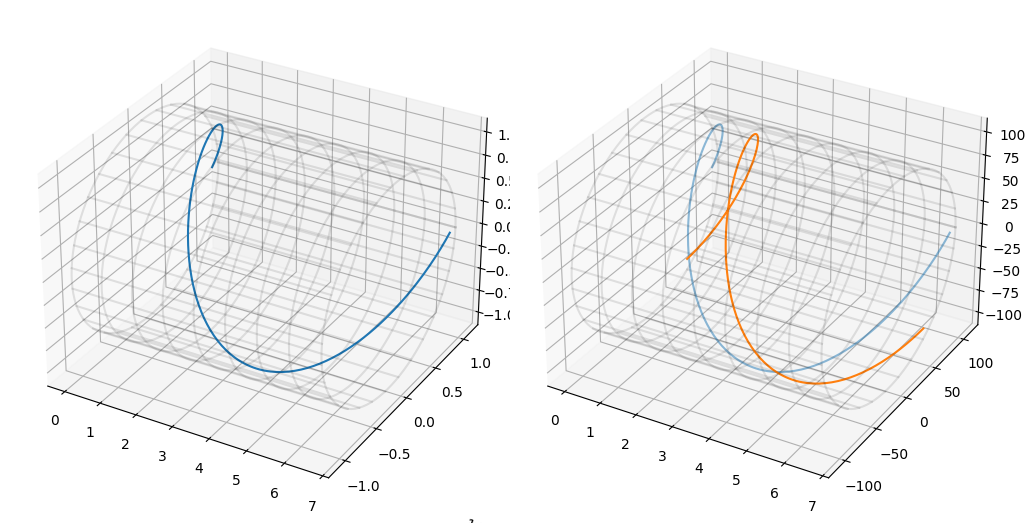

In [4]:
# a "wire barrel" to see better what happens ...
def complex_cylinder(t1, t2, r, fig):
    '''kresli sedy drateny valec ve 3d tak, aby byla dobre videt komplexni exponenciala.
    t1 je pocatecni cas
    t2 je koncovy cas
    r je polomer
    fig je obrazek'''
    phi = np.linspace(0,2 * np.pi,100)
    t = np.linspace(t1,t2,9)
    kolo = r * np.exp(1j * phi)
    for tt in t:
        fig.plot3D(tt * np.ones(phi.shape), np.real(kolo), np.imag(kolo),color='k',alpha=0.1)
    phi = np.linspace(0,2 * np.pi,32)
    kolo = r * np.exp(1j * phi)
    for z in kolo:
        line=art3d.Line3D(*zip((t1,np.real(z),np.imag(z)), (t2,np.real(z),np.imag(z))), markevery=(1, 1), color='k',alpha=0.1)
        ax.add_line(line)

T1 = 1/f1
t = np.linspace(0,T1,200)
x = np.exp(1j * om1 * t)
y = absHom1 * np.exp(1j * (om1 * t + argHom1))
yaux = absHom1 * np.exp(1j * om1 * t)

fig=plt.figure(figsize=(5,5))
ax = fig.add_axes((0,0,1,1),projection="3d")
ax.plot3D(t, np.real(x), np.imag(x))
complex_cylinder(0,T1,1.1,ax)
ax = fig.add_axes((1,0,1,1),projection="3d")
ax.plot3D(t, np.real(yaux), np.imag(yaux),alpha=0.5)
ax.plot3D(t, np.real(y), np.imag(y))
complex_cylinder(0,T1,110,ax)


<StemContainer object of 3 artists>

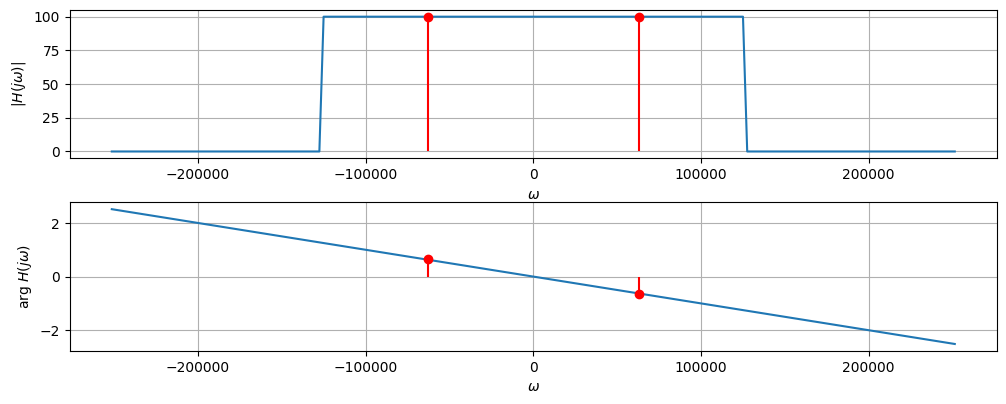

In [5]:
# >>>>>>>>>>>>>>>>> #amplifier_cosine <<<<<<<<<<<<<<<<<<<<<<<<<
f1 = 10000 #<---- set frequency in Hertz here
om1 = f1 * 2 * np.pi
ii = np.searchsorted(om, om1)
absHom1 = absH[ii]
argHom1 = argH[ii]

fig, ax = plt.subplots(2,1,figsize=(10,4))
fig.tight_layout()
ax[0].plot(om,absH)
ax[0].grid()
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|H(j\omega)|$')
ax[0].stem([-om1,om1],[absHom1,absHom1],linefmt='r',markerfmt='ro',basefmt=" ")

ax[1].plot(om,argH)
ax[1].grid()
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('arg $H(j\omega)$')
ax[1].stem([-om1,om1],[-argHom1,argHom1],linefmt='r',markerfmt='ro',basefmt=" ")


Text(87.72222222222221, 0.5, '$y(t)$')

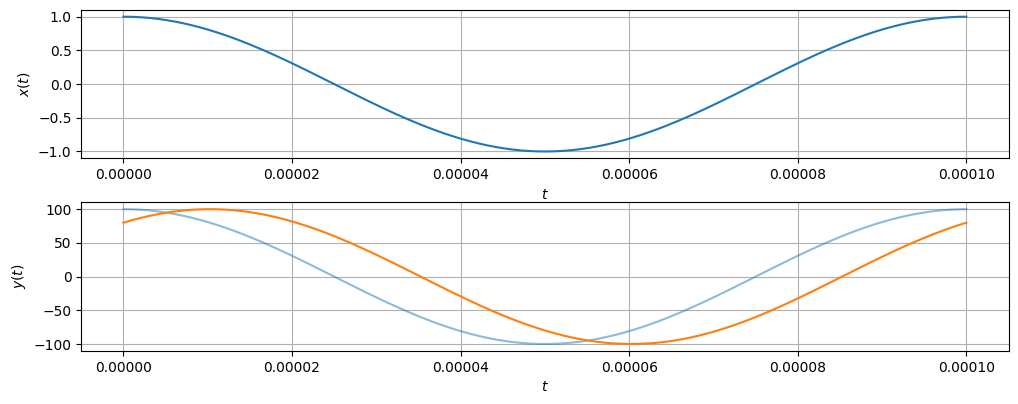

In [6]:
T1 = 1/f1
t = np.linspace(0,T1,200)
x = np.cos(om1 * t)
y = absHom1 * np.cos(om1 * t + argHom1)
yaux = absHom1 * np.cos(om1 * t)

fig, ax = plt.subplots(2,1,figsize=(10,4))
fig.tight_layout()
ax[0].plot(t,x)
ax[0].grid()
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$x(t)$')

ax[1].plot(t,yaux,alpha=0.5)
ax[1].plot(t,y)
ax[1].grid()
ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$y(t)$')


<StemContainer object of 3 artists>

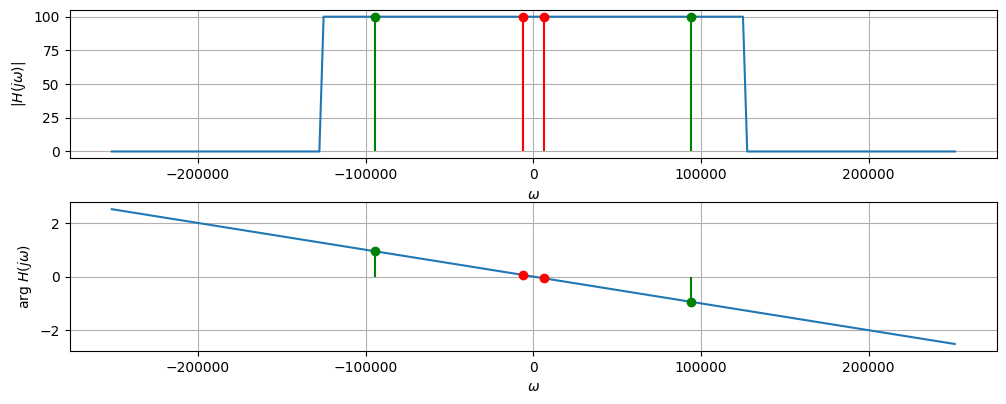

In [15]:
# >>>>>>>>>>>>>>>>> #amplifier_2cosines <<<<<<<<<<<<<<<<<<<<<<<<<
f1 = 1000 #<---- set frequency in Hertz here
f2 = 15000 #<---- set frequency in Hertz here
C1 = 1 #<---- set magnitude here
C2 = 0.3 #<---- set magnitude here

om1 = f1 * 2 * np.pi
ii = np.searchsorted(om, om1)
absHom1 = absH[ii]
argHom1 = argH[ii]
om2 = f2 * 2 * np.pi
ii = np.searchsorted(om, om2)
absHom2 = absH[ii]
argHom2 = argH[ii]

fig, ax = plt.subplots(2,1,figsize=(10,4))
fig.tight_layout()
ax[0].plot(om,absH)
ax[0].grid()
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|H(j\omega)|$')
ax[0].stem([-om1,om1],[absHom1,absHom1],linefmt='r',markerfmt='ro',basefmt=" ")
ax[0].stem([-om2,om2],[absHom2,absHom2],linefmt='g',markerfmt='go',basefmt=" ")

ax[1].plot(om,argH)
ax[1].grid()
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('arg $H(j\omega)$')
ax[1].stem([-om1,om1],[-argHom1,argHom1],linefmt='r',markerfmt='ro',basefmt=" ")
ax[1].stem([-om2,om2],[-argHom2,argHom2],linefmt='g',markerfmt='go',basefmt=" ")


Text(87.72222222222221, 0.5, '$y(t)$')

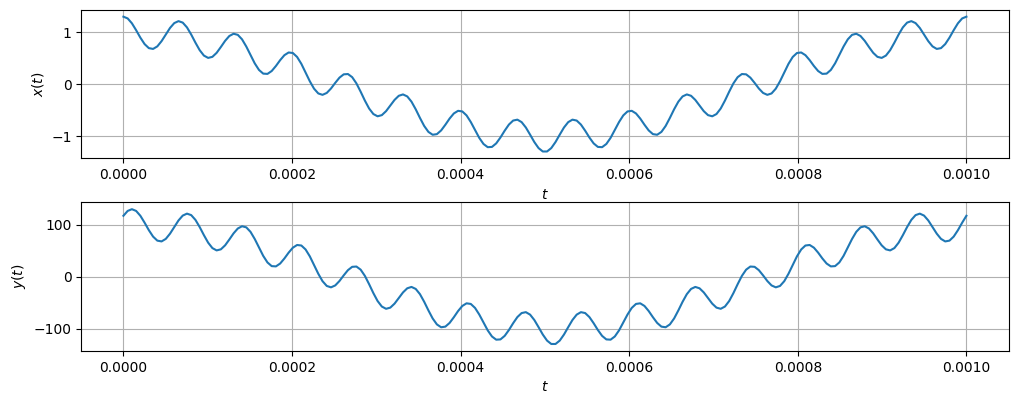

In [16]:
T1 = 1/f1
t = np.linspace(0,T1,200)
x = C1 * np.cos(om1 * t) + C2 * np.cos(om2 * t)
y = absHom1 * C1 * np.cos(om1 * t + argHom1) + absHom2 * C2 * np.cos(om2 * t + argHom2)

fig, ax = plt.subplots(2,1,figsize=(10,4))
fig.tight_layout()
ax[0].plot(t,x)
ax[0].grid()
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$x(t)$')

ax[1].plot(t,y)
ax[1].grid()
ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$y(t)$')


Text(0, 0.5, '$x(t)$')

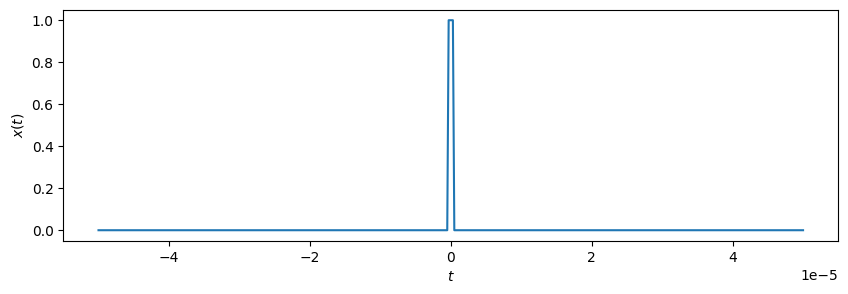

In [9]:
# >>>>>>>>>>>>>>>>> #amplifier_pulse_1 <<<<<<<<<<<<<<<<<<<<<<<<<
theta = 1e-6
D = 1
t = np.linspace(-50e-6,50e-6,500)
x = np.zeros(t.shape)
x[(t >= -theta/2) & (t <= theta/2)] = 1

plt.figure(figsize=(10,3))
plt.plot(t,x)
plt.gca().set_xlabel('$t$')
plt.gca().set_ylabel('$x(t)$')

Text(0, 0.5, 'arg $X(j\\omega)$')

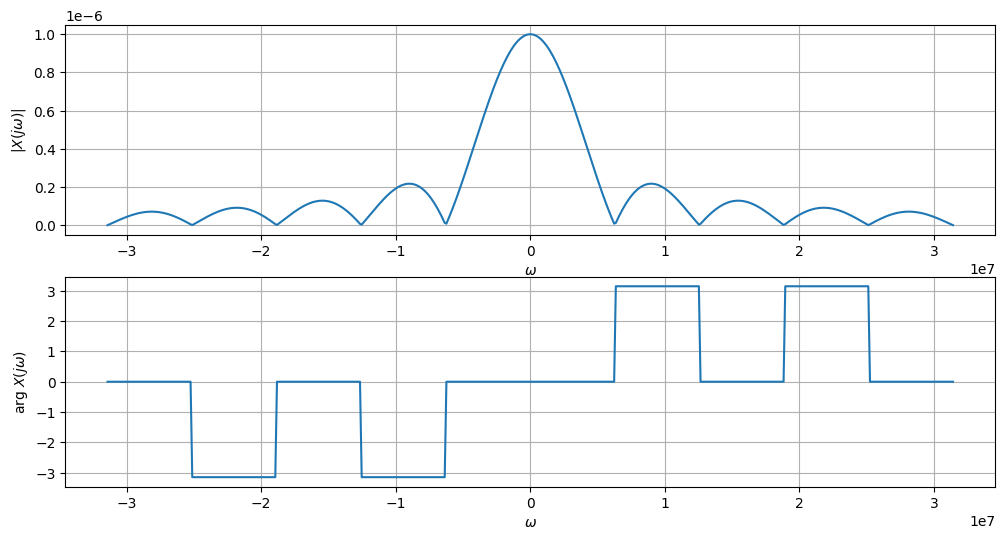

In [10]:
# >>>>>>>>>>>>>>>>> #amplifier_pulse_input_spectrum <<<<<<<<<<<<<<<<<<<<<<<<<
oma = 2e6*np.pi
om = np.linspace(-5*oma,5*oma,500)
X = D * theta * np.sinc(theta / 2 * om / np.pi)    # divide by pi to get the sinc coherent with lecture.
absX = np.abs(X)
argX = np.angle(X)  # need trick to beautify ...
argX = np.abs(argX)
negindices = np.argwhere(om < 0)
argX[negindices] = -argX[negindices]

_, ax = plt.subplots(2,1,figsize=(12,6))
ax[0].plot(om,absX)
ax[0].grid()
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|X(j\omega)|$')
ax[1].plot(om,argX)
ax[1].grid()
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('arg $X(j\omega)$')

Text(0, 0.5, 'arg $H(j\\omega)$')

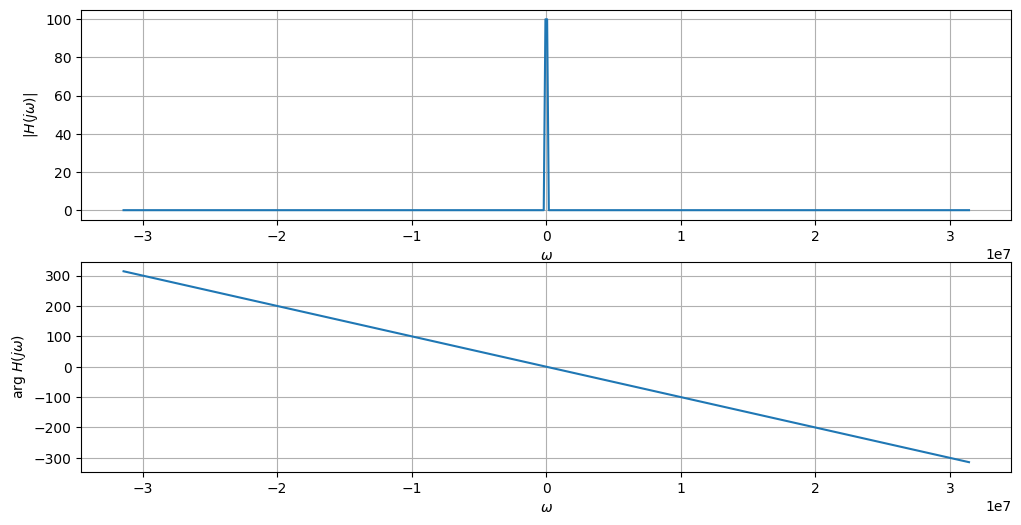

In [11]:
# >>>>>>>>>>>>>>>>> #amplifier_pulse_multiplication <<<<<<<<<<<<<<<<<<<<<<<<<
om_cut = 40000 * np.pi
absH = np.zeros(om.shape)
absH[(om > -om_cut) & (om < om_cut)] = 100
argH = -om / 100000

_, ax = plt.subplots(2,1,figsize=(12,6))
ax[0].plot(om,absH)
ax[0].grid()
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|H(j\omega)|$')
ax[1].plot(om,argH)
ax[1].grid()
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('arg $H(j\omega)$')


Text(0.5, 0, '$\\omega$')

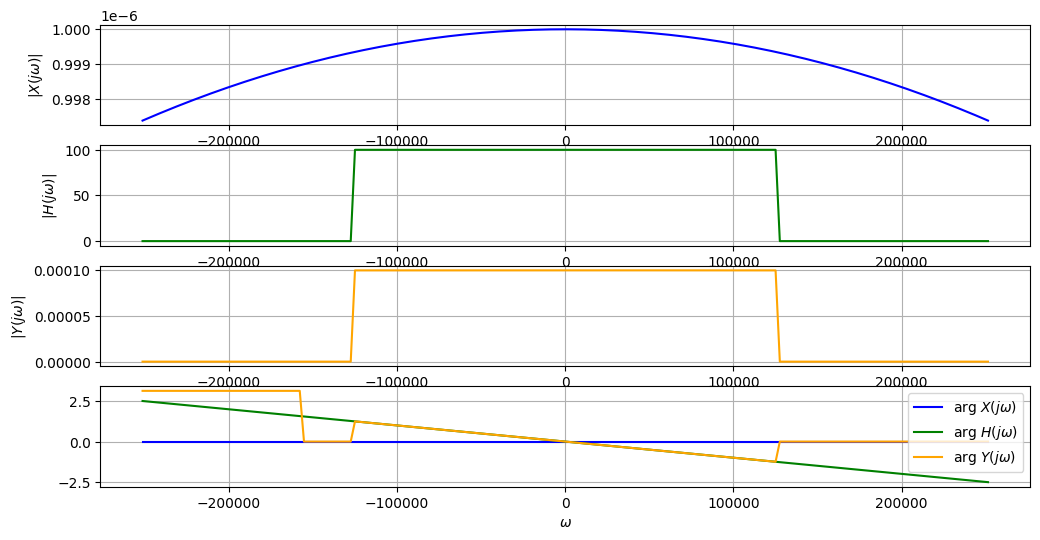

In [12]:
# going back to the original frequency range ...
om = np.linspace(-2*om_cut, 2*om_cut, 200)
absH = np.zeros(om.shape)
absH[(om > -om_cut) & (om < om_cut)] = 100
argH = -om / 100000
X = D * theta * np.sinc(theta / 2 * om / np.pi)    # divide by pi to get the sinc coherent with lecture.
Y = absH * X * np.exp(1j * argH)

_, ax = plt.subplots(4,1,figsize=(12,6))
ax[0].plot(om,X,color='blue')
ax[0].grid()
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|X(j\omega)|$')

ax[1].plot(om,absH,color='green')
ax[1].grid()
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('$|H(j\omega)|$')

ax[2].plot(om,np.abs(Y),color='orange')
ax[2].grid()
ax[2].set_xlabel('$\omega$')
ax[2].set_ylabel('$|Y(j\omega)|$')

ax[3].plot(om,np.angle(X),color='blue',label='arg $X(j\omega)$')
ax[3].plot(om,argH,color='green',label='arg $H(j\omega)$')
ax[3].plot(om,np.angle(Y),color='orange',label='arg $Y(j\omega)$')
ax[3].grid()
ax[3].legend()
ax[3].set_xlabel('$\omega$')   # phases for zero values sometimes nonsense ...


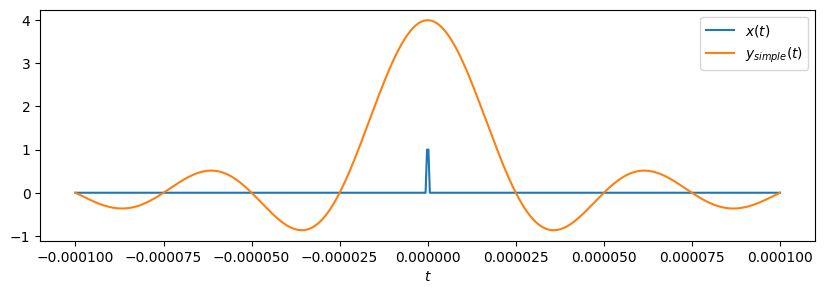

In [13]:
# >>>>>>>>>>>>>>>>> #amplifier_pulse_output_simple <<<<<<<<<<<<<<<<<<<<<<<<<
theta = 1e-6
D = 1
t = np.linspace(-100e-6,100e-6,500)
x = np.zeros(t.shape)
x[(t >= -theta/2) & (t <= theta/2)] = 1
ysimple = 4 * np.sinc(40000 * np.pi * t / np.pi)  # /np.pi for coherence with lectures

plt.figure(figsize=(10,3))
plt.plot(t,x,label='$x(t)$')
plt.plot(t,ysimple,label='$y_{simple}(t)$')
plt.gca().set_xlabel('$t$')
plt.gca().legend()

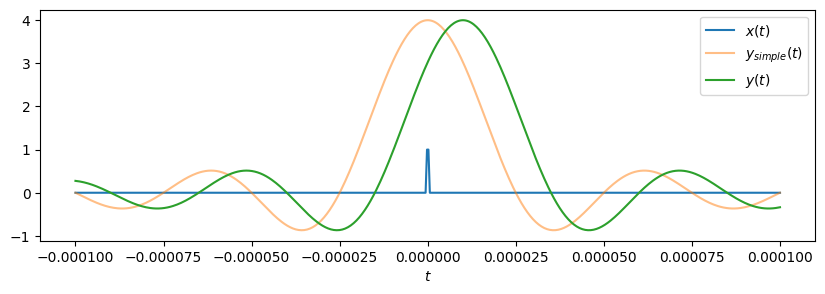

In [14]:
# >>>>>>>>>>>>>>>>> #amplifier_pulse_output_full <<<<<<<<<<<<<<<<<<<<<<<<<
tau = 10e-6
y = 4 * np.sinc(40000 * np.pi * (t - tau) / np.pi)  # /np.pi for coherence with lectures

plt.figure(figsize=(10,3))
plt.plot(t,x,label='$x(t)$')
plt.plot(t,ysimple,label='$y_{simple}(t)$',alpha=0.5)
plt.plot(t,y,label='$y(t)$')
plt.gca().set_xlabel('$t$')
plt.gca().legend()